# PROJECT 1 - FDA

In this project we have used various parameters to describe urban street networks such as 4 way connectivity , straightness, orientation entropy, griddedness, intersection density, average circuity.

There is seen more straightness in the streets since 1990, more connectivity and few dead ends.

In this research paper, the network data was received by Open Street Model Networks.Clustering is done in this paper to understand the connectivity structure in the network

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the urban navigation data set


In [5]:
df=pd.read_excel('Project1_FDA.xlsx')

In [6]:
df.head()

,City,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,proportion of nodes (dead ends),proportion of nodes (four-way intersections)
0,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


In [42]:
df.tail()

,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,proportion of nodes (dead ends),proportion of nodes (four-way intersections),Cluster
95,2.437309,-2.516451,-2.573373,0.511133,-1.031848,0.699599,-0.145322,1.122864,2
96,0.435367,-0.296245,-0.339744,0.863638,-1.216238,0.920124,-0.622200,1.162705,0
97,1.322133,-1.154476,-1.350974,0.723356,1.254591,0.269954,-0.484156,-0.088287,0
98,2.553753,-2.684366,-2.754799,0.744938,-1.253116,1.463834,-0.935935,1.808120,2
99,0.887707,-0.716032,-0.672855,0.593864,-0.663067,1.250913,-1.036330,1.130832,0


In [7]:
df.drop('City',axis=1)

,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,proportion of nodes (dead ends),proportion of nodes (four-way intersections)
0,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...
95,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


# Standardization of the Dataset

We need to maintain a uniform scale across the variables for K-means and Hierarchical clustering by using standardization. For Standardization, all features will be transformed in such a way that it will have properties for standard normal distribution with mean=0 and Standard Deviation=1.
Standardization is done to make all the features in the same scale and give equal importance to all features during learning.
In distance based measurements , we need to define the similarity between data points.
 and that is why we should normalize or standarrdize the data.

In [8]:
scaling=StandardScaler()

In [9]:
df[['orientation-order indicator','street orientation entropy','weighted street orientation entropy','median street segment length','average circuity','average node degree','proportion of nodes (dead ends)','proportion of nodes (four-way intersections)']]=scaling.fit_transform(df[['orientation-order indicator','street orientation entropy','weighted street orientation entropy','median street segment length','average circuity','average node degree','proportion of nodes (dead ends)','proportion of nodes (four-way intersections)']])

In [10]:
df

,City,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,proportion of nodes (dead ends),proportion of nodes (four-way intersections)
0,Bangkok,-0.330477,0.353647,0.335401,-0.661487,0.111372,-2.045566,2.665745,-0.956809
1,Beijing,0.699605,-0.541898,-0.396254,3.399520,-0.109897,0.235734,-0.157872,0.102948
2,Hanoi,-0.755946,0.689477,0.692306,-0.668681,0.332640,-1.190078,1.235113,-1.004618
3,Hong Kong,-0.746989,0.683258,0.665538,-0.790979,2.987859,0.034220,-0.421409,-0.430915
4,Jakarta,-0.052803,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.344105,-1.052426
...,...,...,...,...,...,...,...,...,...
95,Seattle,2.437309,-2.516451,-2.573373,0.511133,-1.031848,0.699599,-0.145322,1.122864
96,St Louis,0.435367,-0.296245,-0.339744,0.863638,-1.216238,0.920124,-0.622200,1.162705
97,Toronto,1.322133,-1.154476,-1.350974,0.723356,1.254591,0.269954,-0.484156,-0.088287
98,Vancouver,2.553753,-2.684366,-2.754799,0.744938,-1.253116,1.463834,-0.935935,1.808120


Based on the data I understood that:
The features do not strictly follow a normal distribution, showing varying degrees of skewness.
The range of values across different features varies significantly, indicating that scaling might be necessary to ensure consistent model performance.
Given these observations, standardization might be more appropriate for this dataset because it is less sensitive to outliers and does not assume a normal distribution of the features. Standardization will transform the data to have a mean of 0 and a standard deviation of 1, which is beneficial for many machine learning algorithms, especially those that rely on gradient descent optimization or assume features are centered around zero.

In [11]:
df=df.drop('City',axis=1)

# Implenting Correlation using HeatMap

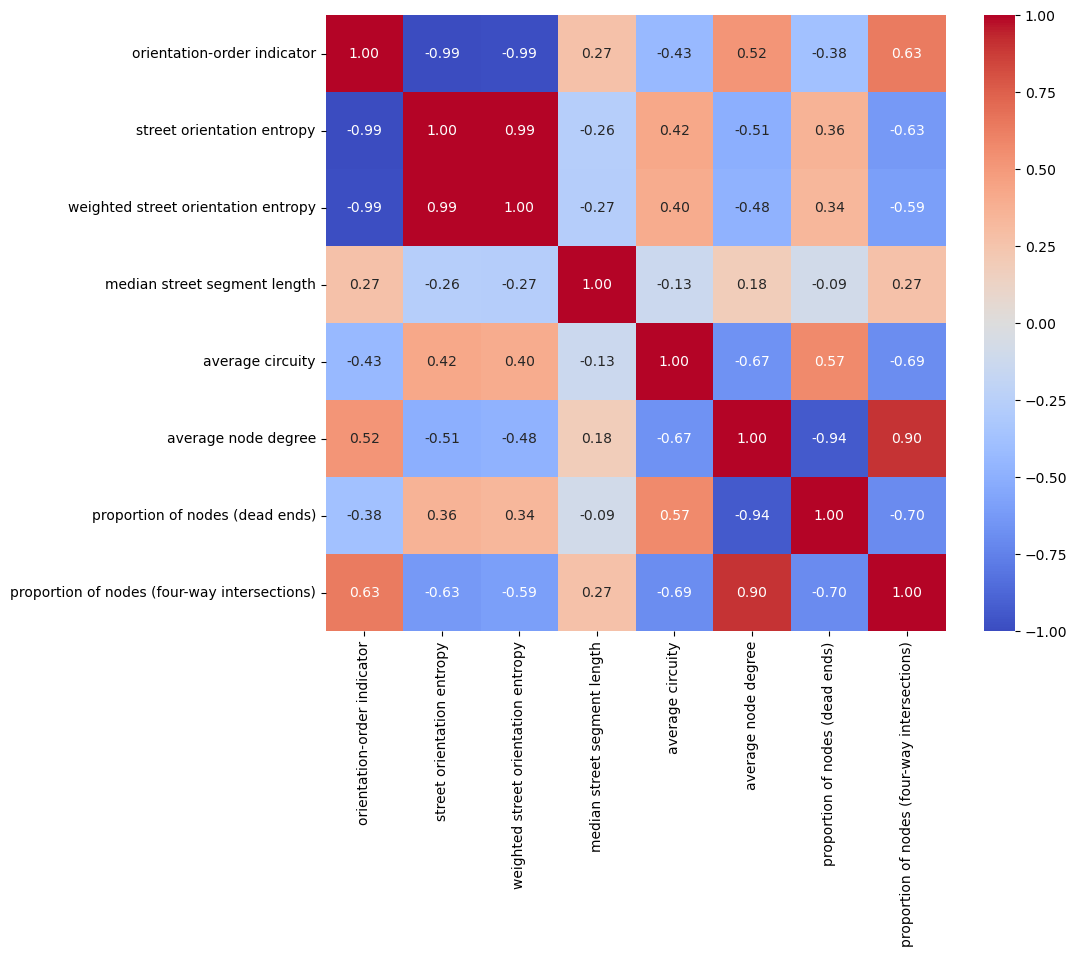

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.show()

The above data shows that street orientation entropy, weighted street orientation entropy are highly correlated.

# Using elbow method to determine number of clusters


In the code snippet I provided, I'm using the k-means clustering algorithm from scikit-learn to find the best number of clusters for my dataset (df) using the Elbow Method. I loop through a range of cluster numbers (1 to 10), fitting a k-means model for each iteration and calculating the within-cluster sum of squares (inertia). The inertia values are then stored in a list. After that, I use Matplotlib to create a plot with the x-axis representing the number of clusters and the y-axis representing inertia. The resulting graph allows me to visually identify the optimal number of clusters by locating the elbow point, where the inertia starts decreasing at a slower rate. This helps me make an informed decision on the suitable number of clusters which is 3 for subsequent analysis or modeling in my dataset.

/Users/muskanjain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanjain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanjain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanjain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

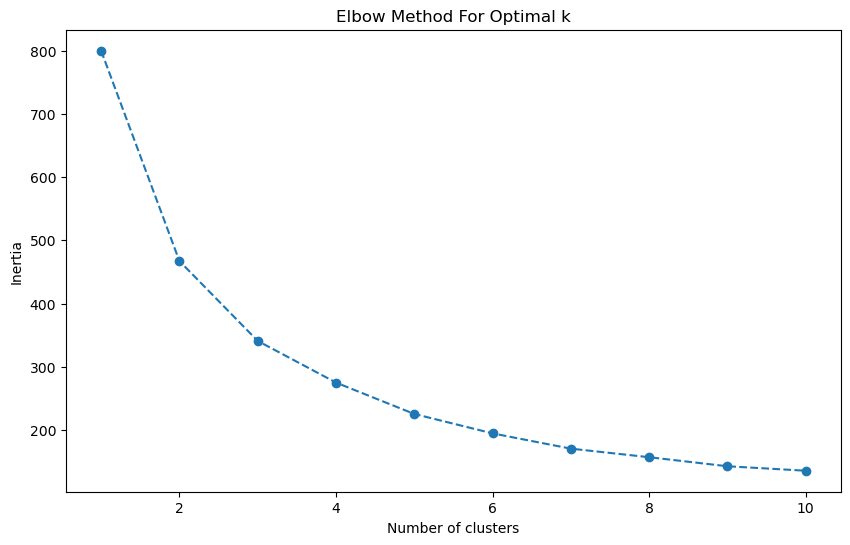

In [15]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the graph, it appears that the elbow point is around 3 or 4 clusters, indicating that this might be the optimal number of clusters for our dataset. This suggests that we should consider using 3 or 4 clusters for the K-means clustering algorithm to categorize the data.



# Implementing K-means Clustering for 3 clusters

In [16]:
k = 3


kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(df.iloc[:,1:])

labels = kmeans.predict(df.iloc[:,1:])

df['Cluster'] = labels


df

/Users/muskanjain/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,proportion of nodes (dead ends),proportion of nodes (four-way intersections),Cluster
0,-0.330477,0.353647,0.335401,-0.661487,0.111372,-2.045566,2.665745,-0.956809,1
1,0.699605,-0.541898,-0.396254,3.399520,-0.109897,0.235734,-0.157872,0.102948,0
2,-0.755946,0.689477,0.692306,-0.668681,0.332640,-1.190078,1.235113,-1.004618,1
3,-0.746989,0.683258,0.665538,-0.790979,2.987859,0.034220,-0.421409,-0.430915,1
4,-0.052803,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.344105,-1.052426,1
...,...,...,...,...,...,...,...,...,...
95,2.437309,-2.516451,-2.573373,0.511133,-1.031848,0.699599,-0.145322,1.122864,2
96,0.435367,-0.296245,-0.339744,0.863638,-1.216238,0.920124,-0.622200,1.162705,0
97,1.322133,-1.154476,-1.350974,0.723356,1.254591,0.269954,-0.484156,-0.088287,0
98,2.553753,-2.684366,-2.754799,0.744938,-1.253116,1.463834,-0.935935,1.808120,2


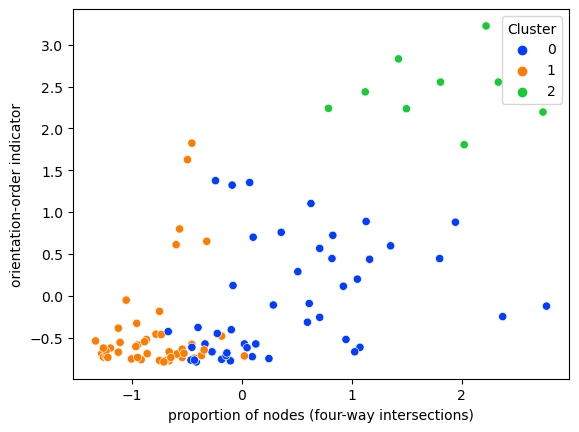

In [46]:
#Scatter Plot for Kmeans Clusters for proportion of nodes (four-way intersections) vs orientation-order indicator
import seaborn as sns
sns.scatterplot (x='proportion of nodes (four-way intersections)',y= 'orientation-order indicator', hue='Cluster', data=df,palette='bright')
plt.show()

In [19]:
df['Cluster']

0     1
1     0
2     1
3     1
4     1
     ..
95    2
96    0
97    0
98    2
99    0
Name: Cluster, Length: 100, dtype: int32

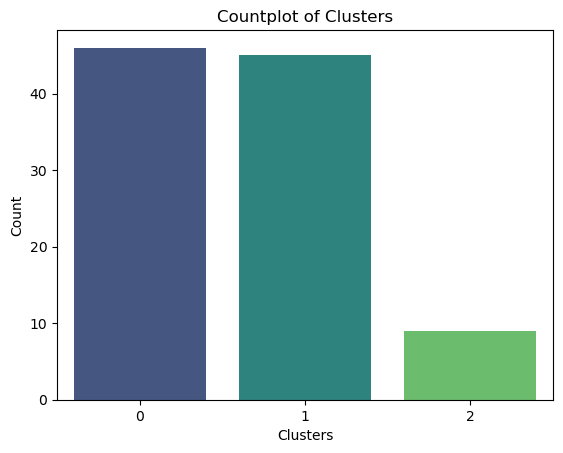

In [20]:
import seaborn as sns
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Countplot of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()


# Insights on Clusters

The plot shows the relationship between proportion of nodes(four way intersection) and orientation order indicator for different clusters of data points.

Cluster 0 (blue) represents networks with moderate proportion of nodes and low orientation order indicator. These networks may have a random or chaotic structure that is neither complex nor ordered.

Cluster 1 (orange) represents networks with low proportion of nodes and low orientation order indicator. These networks may have a simple or sparse structure that is also random or chaotic.

Cluster 2 (green) represents networks with high proportion of nodes and high orientation order indicator. These networks may have a complex or dense structure that is also aligned or oriented.

# Implementing Hierarchial Clustering on the Data

This dendrogram visualizes the hierarchical clustering of cities based on their urban spatial characteristics. 

Each leaf represents a city, and the height of the joins reflects the distance between clusters, indicating how similar or dissimilar cities are in terms of their urban spatial order.

# Single Linkage


In single linkage hierarchical clustering, we merge in each step the two clusters whose two closest members have the the two clusters with the smallest minimum pairwise distance


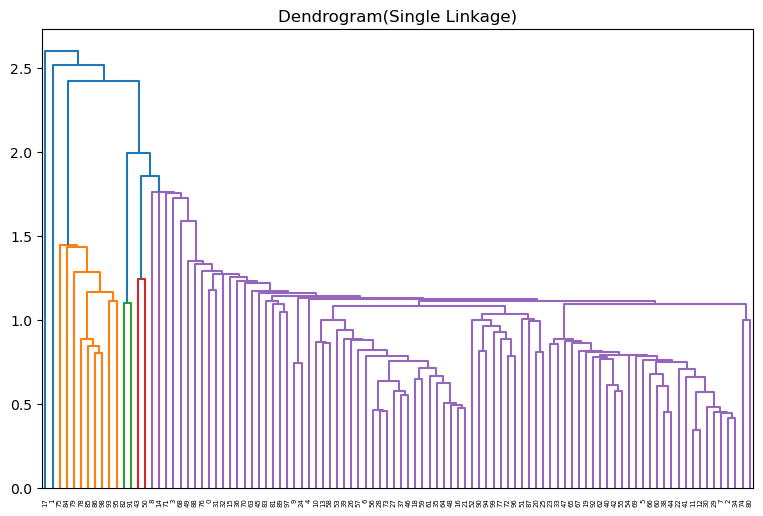

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_methods = ['single']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df, method=method)  
    dendrogram(Z)
    plt.title('Dendrogram(Single Linkage)') 


plt.tight_layout()
plt.show()

I obtained a chain line structure as the output with 5 clusters in single linkage

# Complete Linkage

In complete linkage, we define the distance between two clusters to be the maximum distance between any single data point in the first cluster and any single data point in the second cluster.

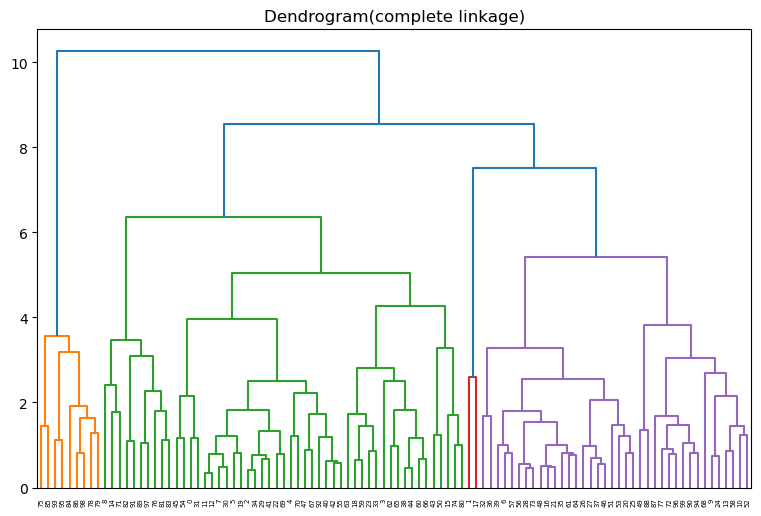

In [47]:
linkage_methods = ['complete']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df, method=method)  
    dendrogram(Z)
    plt.title('Dendrogram(complete linkage)') 


plt.tight_layout()
plt.show()

Clusters that merge at lower heights are more similar to each other than those merging at higher heights.

# Average Linkage

In an Average linkage clustering, the distance between two clusters is defined as the average of distances between all pairs of objects

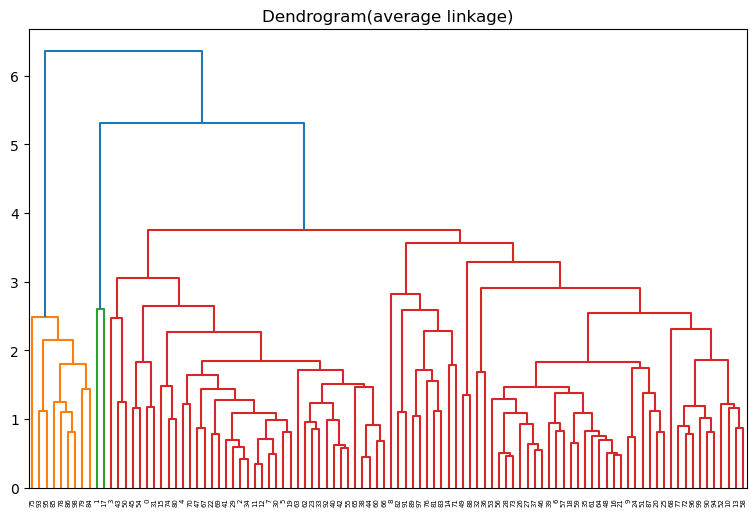

In [45]:
linkage_methods = ['average']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df, method=method)  
    dendrogram(Z)
    plt.title('Dendrogram(average linkage)')  


plt.tight_layout()
plt.show()

It balances the linkage method between single and complete.

# Ward Linkage

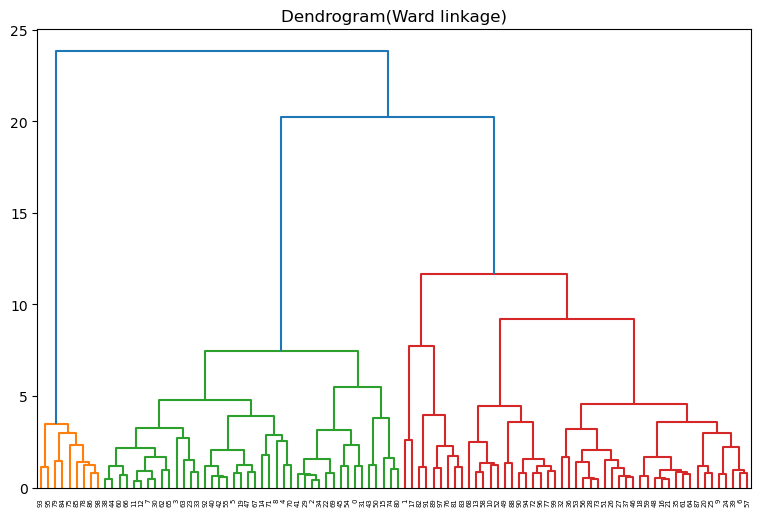

In [51]:
linkage_methods = ['ward']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df, method=method)  
    dendrogram(Z)
    plt.title('Dendrogram(Ward linkage)')  


plt.tight_layout()
plt.show()

This dendrogram visualizes how the hierarchical clustering algorithm groups the observations into clusters based on their similarities. Each merge represents a point where two clusters have been combined, and the height of the merge point indicates the distance between these clusters. The longer the vertical lines, the larger the distance, suggesting less similarity between merged clusters. This visualization can help in identifying the number of clusters by looking for significant gaps in the dendrogram.

In [24]:
df_city=pd.read_excel('Project1_FDA.xlsx')

# VISUALIZATIONS

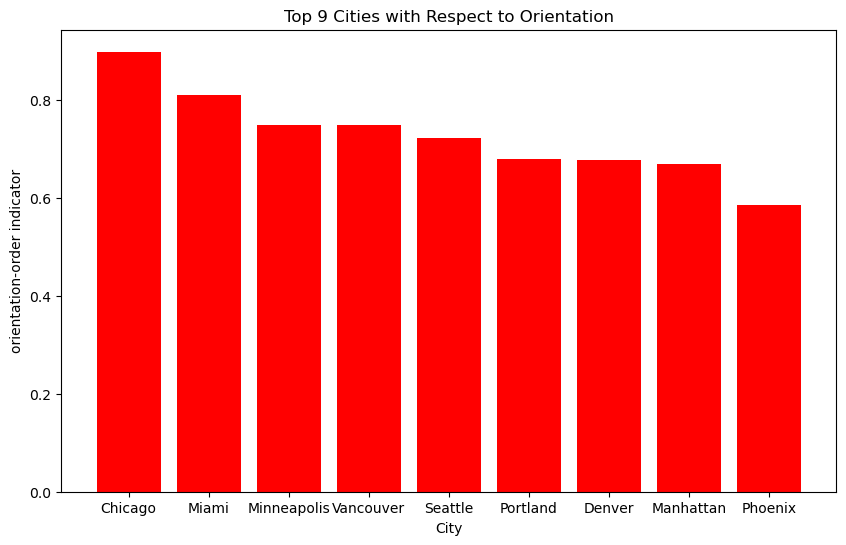

In [41]:
top_cities = df_city.sort_values(by='orientation-order indicator', ascending=False).head(9)

plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['orientation-order indicator'], color='red')
plt.xlabel('City')
plt.ylabel('orientation-order indicator')
plt.title('Top 9 Cities with Respect to Orientation')
plt.show()

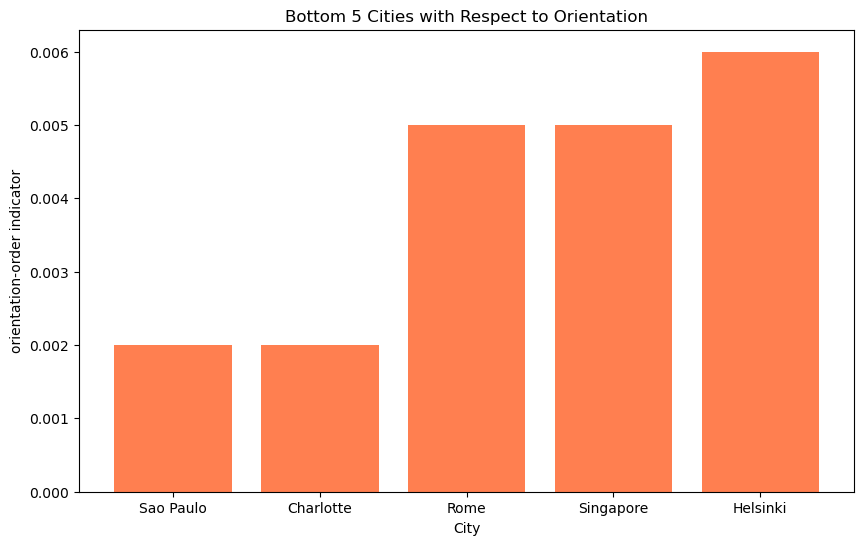

In [27]:
bottom_cities = df_city.sort_values(by='orientation-order indicator').head(5)

plt.figure(figsize=(10, 6))
plt.bar(bottom_cities['City'], bottom_cities['orientation-order indicator'], color='coral')
plt.xlabel('City')
plt.ylabel('orientation-order indicator')
plt.title('Bottom 5 Cities with Respect to Orientation')
plt.show()

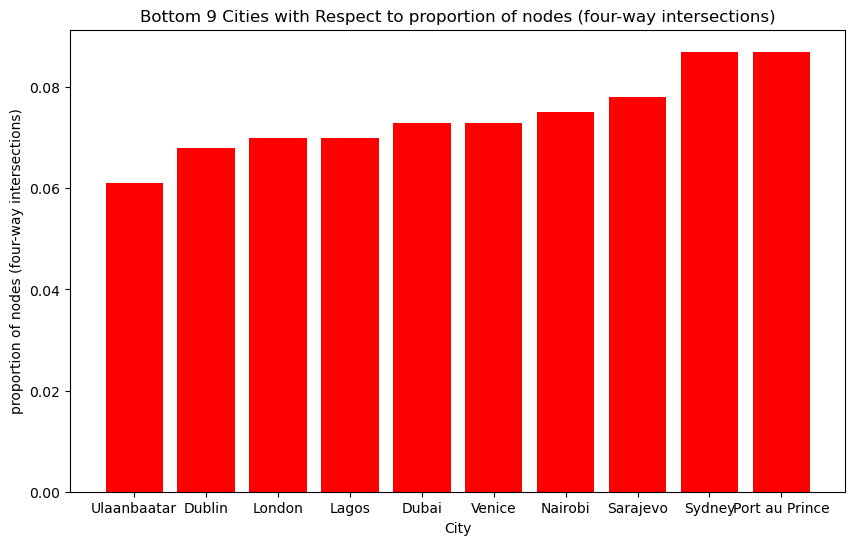

In [40]:
bottom_cities = df_city.sort_values(by='proportion of nodes (four-way intersections)').head(10)

plt.figure(figsize=(10, 6))
plt.bar(bottom_cities['City'], bottom_cities['proportion of nodes (four-way intersections)'], color='red')
plt.xlabel('City')
plt.ylabel('proportion of nodes (four-way intersections)')
plt.title('Bottom 9 Cities with Respect to proportion of nodes (four-way intersections)')
plt.show()

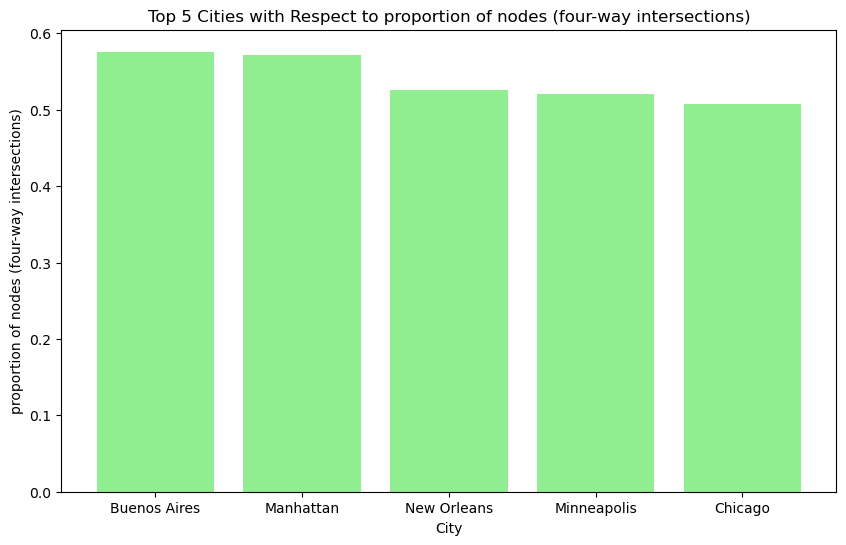

In [35]:
top_cities = df_city.sort_values(by='proportion of nodes (four-way intersections)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['proportion of nodes (four-way intersections)'], color='lightgreen')
plt.xlabel('City')
plt.ylabel('proportion of nodes (four-way intersections)')
plt.title('Top 5 Cities with Respect to proportion of nodes (four-way intersections)')
plt.show()

# Challenges incurred during this project

1.) Challenges of keeping consistent data

2.) Challenges on defining consistent study site boundary

3.) Challenges on modelling and analyzing large graphs

# Conclusion

The study on street networks across 100 cities worldwide aimed to overcome the limitations of previous research by examining a larger and more diverse sample. It focused on understanding the spatial logic that governs city transportation dynamics, which can be planned or emerge organically, resulting in either ordered or disordered patterns. By measuring network orientation entropy, circuity, connectedness, and grain, the research introduced a novel orientation-order indicator to quantify the degree of order in a network based on a single grid system.

Key findings include:
- A significant correlation between orientation order indicator and other spatial order indicators such as street circuity and connectedness, suggesting that orientation order indicator is a reliable measure of spatial order.
- Empirical evidence that cities in the US and Canada tend to have more grid-like street networks, characterized by lower entropy and circuity, indicating a higher degree of spatial order compared to cities in other regions.

This comprehensive analysis provides valuable insights into the spatial organization of urban street networks, highlighting the importance of considering various indicators of spatial order in urban planning and development.